In [1]:
# To import detective
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np
import detective.core as detective
import detective.helpers as helpers
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [2]:
date_range = pd.date_range(start='2011-01-01 10:15:00', end='2012-01-01 10:15:00', freq='H')

In [3]:
times =  pd.DataFrame(data={'value': np.random.randint(low=0, high=2, size=len(date_range))}, index = date_range)

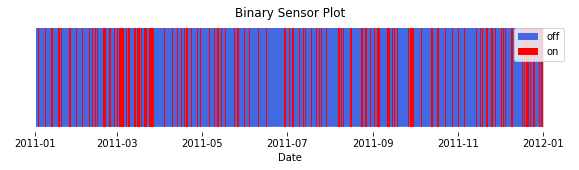

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
ax.fill_between(times.index, y1=0, y2=1, facecolor = 'royalblue', label = 'off')
ax.fill_between(times.index, where = (times['value'] == 1), y1=0, y2=1, facecolor = 'red' , label = 'on')
plt.xlabel('Date'); plt.yticks([]); plt.title('Binary Sensor Plot')
plt.legend();
a=fig.gca()
a.set_frame_on(False)


# Robin test real data

In [5]:
# For cloud database with secret credentials, load from json. Time to load vaires, up to 3 mins.
filename = '/Users/robincole/Desktop/hass_db_url.json'
DB_URL = helpers.load_url(filename)

In [6]:
%%time
parser = detective.DataParser(DB_URL)

Querying the database, this could take a while
CPU times: user 5.88 s, sys: 1.4 s, total: 7.28 s
Wall time: 1min 29s


In [7]:
sensors_binary = detective.BinarySensors(parser.master_df)

/Users/robincole/Documents/Github/HASS-data-detective/detective/core.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  lambda x: helpers.binary_state(x))


In [8]:
sensors_binary.entities

['binary_sensor.motion_at_home',
 'binary_sensor.in_bed_bayesian',
 'binary_sensor.elgato_door',
 'binary_sensor.late_night_sensor',
 'binary_sensor.devices_home',
 'binary_sensor.wipy_water_monitor',
 'binary_sensor.fibaro_leak',
 'binary_sensor.macbook',
 'binary_sensor.workday_sensor',
 'binary_sensor.living_room_nest_protect_online',
 'binary_sensor.blink_armed_status',
 'binary_sensor.blink_blink_camera_percy_motion_enabled',
 'binary_sensor.doorbell']

In [9]:
binary_sensor = sensors_binary.data['binary_sensor.late_night_sensor']
binary_sensor.dropna(inplace=True) # Drop the None
binary_sensor_dummy = pd.get_dummies(binary_sensor)[True]  # returns a series
binary_sensor_dummy = binary_sensor_dummy.to_frame()
binary_sensor_dummy.columns = ['value']
binary_sensor_dummy[0:20]

,value
last_changed,
2017-12-25 07:30:00.474791,0
2017-12-25 22:01:01.264267,1
2017-12-26 07:00:00.272117,0
2017-12-26 08:27:42.019300,0
2017-12-26 08:32:39.013654,0
2017-12-26 09:54:26.722147,0
2017-12-26 22:01:01.168722,1
2017-12-27 07:00:01.171748,0
2017-12-27 22:01:01.170321,1


In [17]:
a = binary_sensor_dummy.iloc[0]['value']
?a

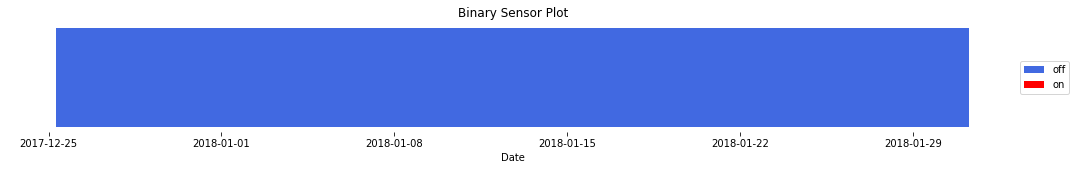

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(18, 2))
ax.fill_between(binary_sensor_dummy.index, y1=0, y2=1, facecolor = 'royalblue', label = 'off')
ax.fill_between(binary_sensor_dummy.index, where = (binary_sensor_dummy['value'] > 0.1), y1=0, y2=1, facecolor = 'red' , label = 'on')
plt.xlabel('Date')
plt.yticks([])
plt.title('Binary Sensor Plot')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
a=fig.gca()
a.set_frame_on(False);

Hmm why no seeing any on?

In [20]:
binary_sensor_dummy.to_csv('binary_data.csv')